Aprendizado Não Supervisionado - CLUSTERING / AGRUPAMENTO

O K-Means é um algoritmo de aprendizado de máquina não supervisionado que agrupa dados em um número k de clusters. O número de clusters é definido pelo usuário e o algoritmo tentará agrupar os dados mesmo que esse número não seja o ideal para o caso específico. Portanto, temos que criar uma técnica que nos ajude a decidir quantos clusters devemos usar para o modelo K-Means.



In [1]:
# Importando os pacotes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importando o algoritmo K-Means:
from sklearn.cluster import KMeans

# Métrica de avaliação para modelos de clustering:
from sklearn.metrics import silhouette_score

# Vamos utilizar o dataset Iris dentro do pacote datasets do sklearn:
from sklearn import datasets

# O pacote warnings inibe a visualização de avisos nos outputs do Colab.
import warnings
warnings.filterwarnings('ignore')

Para exemplificar, utilizaremos o "lendário" dataset "IRIS".

https://en.wikipedia.org/wiki/Iris_flower_data_set

https://www.kaggle.com/datasets/arshid/iris-flower-dataset


O conjunto de dados da flor Iris é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936.

 Também chamado de conjunto de dados "Iris de Anderson" pois Edgar Anderson coletou os dados para quantificar a variação morfológica das flores Iris de três espécies relacionadas.

 O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (Iris Setosa, Iris Virginica e Iris Versicolor).

 Foram medidas quatro características de cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros.

 Exemplo de Classificação usando o Iris Dataset, no canal Programação Dinâmica:
 https://www.youtube.com/watch?v=DeAuVrhKw58


In [2]:
# Importando a base de dados
# Criamos a variável iris para receber o conjunto de dados
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
# Convertendo a variável iris em um dicionário Python
iris = dict(iris)

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
type(iris)

dict

In [8]:
# Visualizando os atributos de entrada (features) que correspondem às dimensões das pétalas e sépalas das flores:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
# Visualizando a coluna target que corresponde às classes das flores:
# Utilizaremos essa coluna no final do exercício para comparar com os clusters criados pelo algoritmo K-Means:
iris['target']

In [9]:
# Criamos o dataframe df apenas com as colunas referentes às features:
df = pd.DataFrame(iris['data'])
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Método Elbow**

O método Elbow é uma técnica muito popular e a ideia é executar o agrupamento k-means para um intervalo de clusters k (digamos de 1 a 10) e para cada valor, estamos calculando a soma das distâncias ao quadrado de cada ponto até seu centro atribuído (distorções).

In [10]:
distorcoes = []

K = range(1,11) # Adotando 10 clusters.
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df)    # Treinamos o modelo com o algoritmo K-Means por 10 vezes
    distorcoes.append(modelo01.inertia_)

# Observação:
# O método "inertia_" permite calcular as distorções, ou seja,
# Soma das distâncias ao quadrado das amostras até o centro do cluster (centroides) mais próximo,
# ponderadas pelos pesos das amostras, se fornecidas

In [11]:
distorcoes

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.256009315718146,
 46.44618205128206,
 39.066035353535355,
 34.427777417027414,
 29.98894395078606,
 27.941807644110273,
 26.02998819807644]

Observando a Curva de Elbow

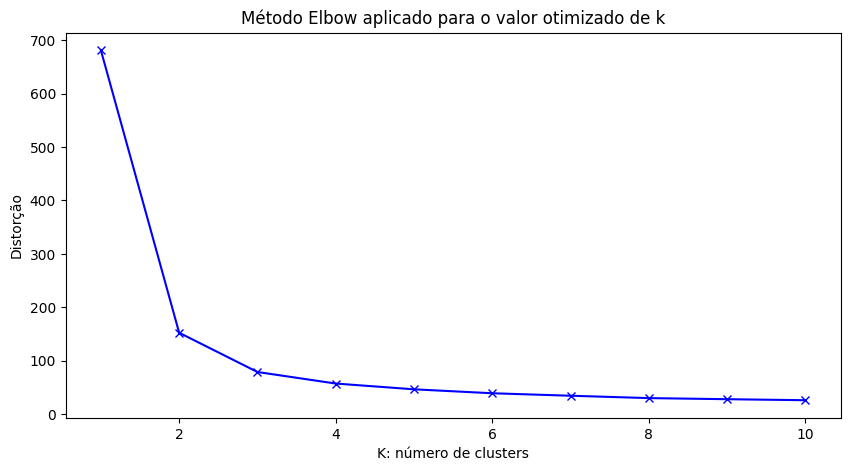

In [12]:
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

# Define os labels do eixos do gráfico:
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Define um título para o gráfico:
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostra o gráfico:
plt.show()

In [21]:
# O número de clusters (grupos) foi adotado com base na curva acima.
modelo_KMeans = KMeans(n_clusters=3)
modelo_KMeans.fit(df)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [14]:
# A partir do modelo treinado, fazemos as predições dos clusters e criamos uma coluna chamada "k_means"
df['clusters'] = modelo_KMeans.predict(df)

In [15]:
df

,0,1,2,3,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
# Adicionando a coluna "target" com os dados originais do dataset, para podermos comparar...
df['target'] = iris['target']

In [17]:
df.head()

,0,1,2,3,clusters,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


Text(0.5, 1.0, 'Clusters criados pelo algoritmo K_Means')

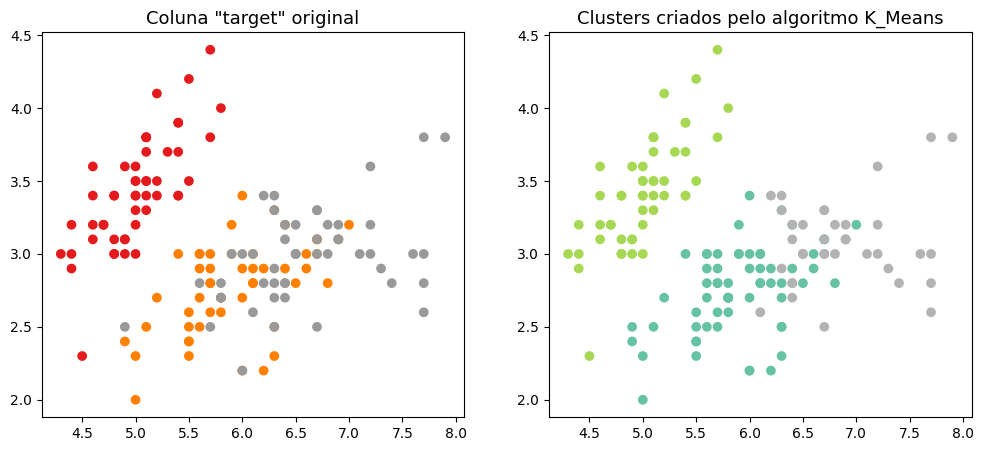

In [18]:
# Comparando graficamente os dados originais e a coluna de clusters criada pelo algoritmo K-Means
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(df[0], df[1], c=df['target'], cmap=plt.cm.Set1)
axes[1].scatter(df[0], df[1], c=df['clusters'], cmap=plt.cm.Set2)
axes[0].set_title('Coluna "target" original', fontsize=13)
axes[1].set_title('Clusters criados pelo algoritmo K_Means', fontsize=13)

Avaliação do modelo de Clustering

Silhouette Score é uma ferramenta para avaliar a adequação dos resultados de agrupamento, fornecendo uma medida quantitativa de quão bem definidos e distintos são os agrupamentos.

Fontes de pesquisa:

https://www.educative.io/answers/what-is-silhouette-score

https://en.wikipedia.org/wiki/Silhouette_(clustering)



In [19]:
silhouette = silhouette_score(df, df['clusters'])
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.6750


**DESAFIO:**

Utilizando o dataset "Mall Customers", disponível em https://www.kaggle.com/datasets/kandij/mall-customers, agrupar os clientes com base nas características de receita anual (Annual Income (k$)) e pontuação de gastos (Spending Score).

- Determine o valor ideal de k, com base no método Elbow.
- Treine o modelo usando o algoritmo K-Means e avalie a qualidade dos clusters, utilizando a métrica Silhoutte Score.

Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://www.youtube.com/watch?v=FqIGui0rwh4 (How to Choose the Number of Clusters)

https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

https://www.kaggle.com/code/eriveltonguedes/7-clusteriza-o-k-means-erivelton
